---
title: "Image stitching example with LoFTR"
description: "A show case of how to do image stitching using LoFTR from Kornia."
author:
    - "Edgar Riba"
date: 11-19-2021
categories:
    - Intermediate
    - LoFTR
    - kornia.feature
image: "../tutorials/assets/image_stitching.png"
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/image_stitching.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

<a href="https://huggingface.co/spaces/kornia/Image-Stitching"><img src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue.svg" alt="Open in HF Spaces"></a>

First, we will install everything needed:



*  fresh version of [kornia](https://github.com/kornia/kornia) for [LoFTR](https://zju3dv.github.io/loftr/)
*  fresh version of [kornia](https://github.com/kornia/kornia) for [ImageStitcher](https://kornia.readthedocs.io/en/latest/contrib.html#kornia.contrib.ImageStitcher)


In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

Now let's download an image pair


In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1].split("?")[0] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image("http://www.ic.unicamp.br/~helio/imagens_registro/foto1B.jpg")
download_image("http://www.ic.unicamp.br/~helio/imagens_registro/foto1A.jpg")

'foto1A.jpg'

In [ ]:
%%capture
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch


def load_images(fnames):
    return [K.io.load_image(fn, K.io.ImageLoadType.RGB32)[None, ...] for fn in fnames]


imgs = load_images(["foto1A.jpg", "foto1B.jpg"])

## Stitch them together

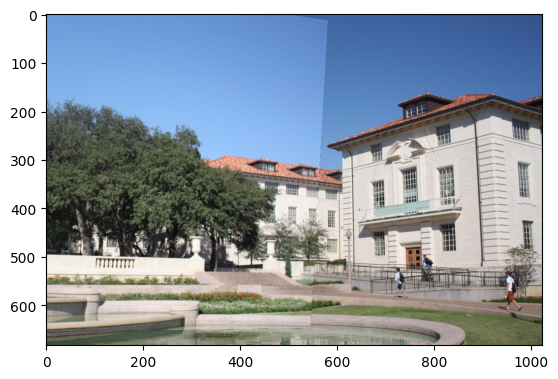

In [ ]:
from kornia.contrib import ImageStitcher

IS = ImageStitcher(KF.LoFTR(pretrained="outdoor"), estimator="ransac")

with torch.no_grad():
    out = IS(*imgs)

plt.imshow(K.tensor_to_image(out))
plt.show()

## Another example

In [ ]:
download_image("https://github.com/daeyun/Image-Stitching/blob/master/img/hill/1.JPG?raw=true")
download_image("https://github.com/daeyun/Image-Stitching/blob/master/img/hill/2.JPG?raw=true")
download_image("https://github.com/daeyun/Image-Stitching/blob/master/img/hill/3.JPG?raw=true")

'3.JPG'

In [ ]:
imgs = load_images(["1.JPG", "2.JPG", "3.JPG"])

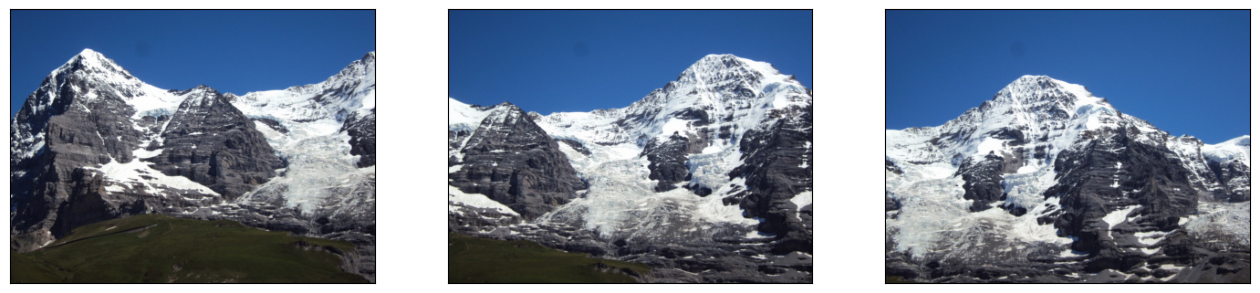

In [ ]:
f, axarr = plt.subplots(1, 3, figsize=(16, 6))

axarr[0].imshow(K.tensor_to_image(imgs[0]))
axarr[0].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
axarr[1].imshow(K.tensor_to_image(imgs[1]))
axarr[1].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
axarr[2].imshow(K.tensor_to_image(imgs[2]))
axarr[2].tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)

In [ ]:
matcher = KF.LocalFeatureMatcher(KF.GFTTAffNetHardNet(100), KF.DescriptorMatcher("snn", 0.8))
IS = ImageStitcher(matcher, estimator="ransac")

with torch.no_grad():
    out = IS(*imgs)

<matplotlib.image.AxesImage>

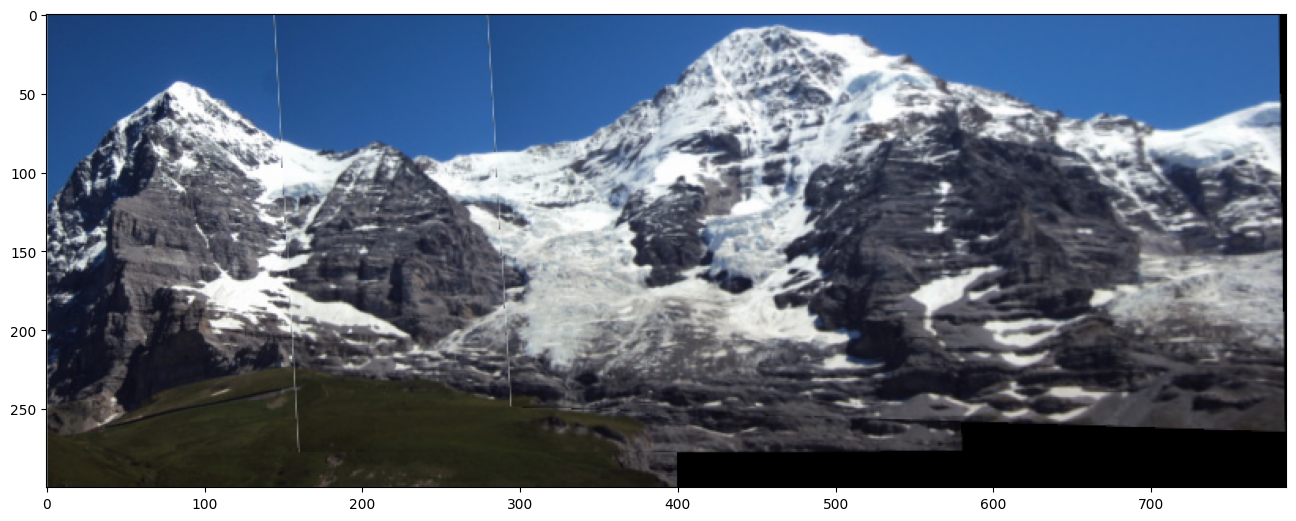

In [ ]:
plt.figure(figsize=(16, 16))
plt.imshow(K.tensor_to_image(out))